<BarContainer object of 12 artists>

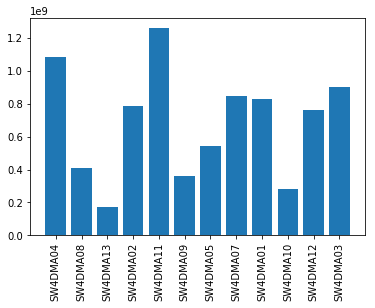

In [10]:
from operator import add
import matplotlib.pyplot as plt
import pandas as pd

xheaders=[]
barPlotValue=[]

rdd1 = sc.textFile("/home/shayal/Billed_Consumption_SW4_sub-division.csv")
rdd2=rdd1.filter(lambda c:"-1" not in c).filter(lambda c:"-2" not in c).filter(lambda c:",0," not in c).filter(lambda c: ",," not in c)
rdd3=rdd2.map(lambda x: (x.split(",")[3], int(x.split(",")[5])+int(x.split(",")[6])+int(x.split(",")[7])+int(x.split(",")[8])+int(x.split(",")[9])+int(x.split(",")[10])+int(x.split(",")[11])+int(x.split(",")[12])+int(x.split(",")[13])+int(x.split(",")[14])+int(x.split(",")[15])+int(x.split(",")[16])))
rdd4=rdd3.reduceByKey(add)
rdd5=rdd4.map(lambda c:c[0]+","+str(c[1]))
rdd5.coalesce(1).saveAsTextFile("/home/shayal/countConnections")
with open("/home/shayal/countConnections/part-00000") as f:
	for line in f:
		data=line.strip().split(",")
		xheaders.append(data[0])
		barPlotValue.append(int(data[1]))

plt.xticks(rotation=90)
plt.bar(xheaders,barPlotValue)